# <center>Network Science</center>

Home Assignment #1: Network description and network centralities

**Due Date:** 08.05.2020 18:00 <br>
**Late submission policy:** -1 points per day <br>


Please send your reports to <iakarpov@hse.ru> with message subject of the following structure: <br>
**[HSE SNA Magolego 2020] *{LastName}* *{First Name}* HW_*{Number}***

Support your computations with figures and comments. <br>
If you are using IPython Notebook you may use this file as a starting point of your report.

### Task 1. Data preparation

<img src ="https://dl.dropboxusercontent.com/s/nt1tbmathgo3gg8/g1.png?dl=1" style="width:600px;heigth:200px">

1.1. Load [VKontakte](https://dl.dropboxusercontent.com/s/8eo1sjfhu5spb0f/vk.tsv?dl=1) dataset to NetworkX <br>
1.2. Choose 3-5 nodes from the existing network and create the subgraph with network framing (only `seed` and `friends#1` nodes, only `r0`, `r1`, `r2` edges) <br>
1.3. Find graph diameter, average and global clustering coefficient <br>
1.4. Find max and mean values of incoming and outcoming node degrees <br>
1.5. Vizualize your graph in gephi, networkX and grahistry <br>


1.1. Load VKontakte dataset to NetworkX 

In [1]:
#загрузка необходимых для работы библиотек
import urllib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [50]:
# df.to_csv('range_1_ids.tsv',sep = '\t')
df = pd.read_csv('vk.tsv',sep = '\t')
df.head()

,Unnamed: 0,Friends,ID,Name
0,0,VK_4766099,VK_97803804,Никита Кузнецов
1,1,VK_5227712,VK_97803804,Никита Кузнецов
2,2,VK_11047376,VK_97803804,Никита Кузнецов
3,3,VK_11079816,VK_97803804,Никита Кузнецов
4,4,VK_14492163,VK_97803804,Никита Кузнецов


In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pymongo import MongoClient
from bson.objectid import ObjectId
import json
from datetime import datetime
import time, sys
import requests

In [51]:
ids = list(df["ID"].unique())
ids

['VK_97803804',
 'VK_73555158',
 'VK_155630933',
 'VK_65606427',
 'VK_15173617',
 'VK_98950709',
 'VK_321512099',
 'VK_82512790',
 'VK_38096132',
 'VK_32003717',
 'VK_88475260',
 'VK_55473678',
 'VK_259166514',
 'VK_556768320',
 'VK_20485849',
 'VK_107202344',
 'VK_97924442',
 'VK_382481084',
 'VK_138043138',
 'VK_15945852',
 'VK_73252139',
 'VK_55567131',
 'VK_258600596',
 'VK_65841267',
 'VK_39085816',
 'VK_11686056',
 'VK_11754426',
 'VK_13313132',
 'VK_13360261',
 'VK_13985194',
 'VK_14038260',
 'VK_14918944',
 'VK_15761824',
 'VK_16020423',
 'VK_17168690',
 'VK_17966003',
 'VK_18410997',
 'VK_18506763',
 'VK_20794250',
 'VK_20897910',
 'VK_21330320',
 'VK_22293074',
 'VK_22798140',
 'VK_26234476',
 'VK_30488669',
 'VK_32215619',
 'VK_35230163',
 'VK_36639406',
 'VK_38147532',
 'VK_40897982',
 'VK_40964865',
 'VK_42359288',
 'VK_43369492',
 'VK_50522563',
 'VK_53442311',
 'VK_64362649',
 'VK_67192615',
 'VK_70245570',
 'VK_74920120',
 'VK_77231089',
 'VK_80275427',
 'VK_85640972',


In [52]:
G=df[df.ID.astype(str).isin(['VK_43555697','VK_15173617','VK_382481084','VK_65606427'])]
G

,Unnamed: 0,Friends,ID,Name
682,682,VK_14603,VK_65606427,Полина Быкова
683,683,VK_369694,VK_65606427,Полина Быкова
684,684,VK_498989,VK_65606427,Полина Быкова
685,685,VK_1231116,VK_65606427,Полина Быкова
686,686,VK_1499191,VK_65606427,Полина Быкова
687,687,VK_1756709,VK_65606427,Полина Быкова
688,688,VK_2026037,VK_65606427,Полина Быкова
689,689,VK_2222642,VK_65606427,Полина Быкова
690,690,VK_2281615,VK_65606427,Полина Быкова
691,691,VK_3713091,VK_65606427,Полина Быкова


In [49]:
list(G["Name"].unique())

['Полина Быкова', 'Елизавета Митрофанова', 'Rišards Jurans', 'Лена Рыбкина']

In [54]:
from tqdm.notebook import tqdm

ModuleNotFoundError: No module named 'tqdm.notebook'

In [53]:
G_small = nx.Graph()
count = 0

node_set = set()
pbar = tqdm(total=len(df_2795), desc='nodes')
for index, row in df1.iterrows():
    if row["ID"] not in G_small.nodes():
        G_small.add_node(row["ID"], attr_dict = {'Name':row["Name"]})
    pbar.update(1)
pbar = tqdm(total=len(df_2795), desc='edges')
for index, row in df_2795.iterrows():
    if (row["ID"], row["Friends"]) not in G_small.edges() and (row["Friends"], row["ID"]) not in G_small.edges():
        G_small.add_edge(row["ID"], row["Friends"])    
    pbar.update(1)

NameError: name 'tqdm' is not defined

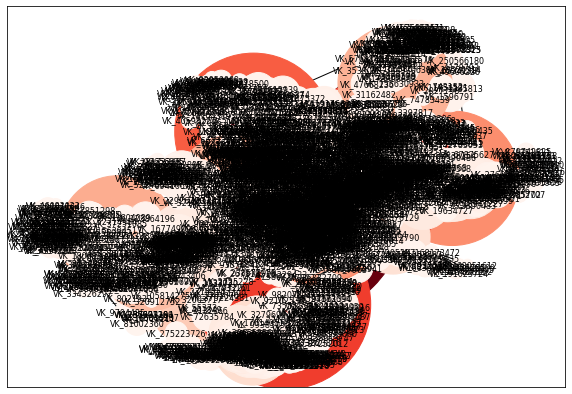

In [9]:
k = nx.degree(G)
plt.figure(1, figsize=(10,7))
coord = nx.spring_layout(G)
nx.draw_networkx(G,
                 pos=coord,
                 nodelist=list(dict(k).keys()),
                 node_size = [d*100 for d in list(dict(k).values())],
                 node_color=list(dict(k).values()),
                 font_size=8,
                 cmap=plt.cm.Reds,
                 )

In [17]:
# Find connected components
CC = nx.connected_components(G)

CC0 = sorted(nx.connected_components(G), key = len, reverse=True)

for v in CC0:
    print(v)

{'VK_147513893', 'VK_410362832', 'VK_49237192', 'VK_11160776', 'VK_50694806', 'VK_49582757', 'VK_15561480', 'VK_79381824', 'VK_8081808', 'VK_30328083', 'VK_22937438', 'VK_6454605', 'VK_132361628', 'VK_318257428', 'VK_19549155', 'VK_20854628', 'VK_145353270', 'VK_195507581', 'VK_8472866', 'VK_318311300', 'VK_50436072', 'VK_170100287', 'VK_297647067', 'VK_34305070', 'VK_29844404', 'VK_78616406', 'VK_69284843', 'VK_95787184', 'VK_6284913', 'VK_44817219', 'VK_162181317', 'VK_242609243', 'VK_103092066', 'VK_10746007', 'VK_248595345', 'VK_146278741', 'VK_209076925', 'VK_67166380', 'VK_321573395', 'VK_4123926', 'VK_141871918', 'VK_22118602', 'VK_4766099', 'VK_22838154', 'VK_84839827', 'VK_89305046', 'VK_151408328', 'VK_58116219', 'VK_143125291', 'VK_32596727', 'VK_40662406', 'VK_99841584', 'VK_77476781', 'VK_168707963', 'VK_26208055', 'VK_17524560', 'VK_175757415', 'VK_84772248', 'VK_21879493', 'VK_134559289', 'VK_241255837', 'VK_13837324', 'VK_3132366', 'VK_165984453', 'VK_110245879', 'VK_12

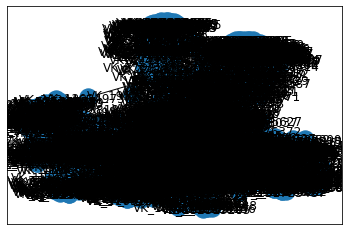

In [18]:
# Draw subgraph
SG = G.subgraph(CC0[0])
nx.radius(SG)
nx.draw_networkx(SG)

Общая информация

/Users/polinabykova/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


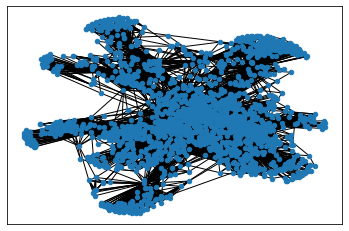

In [14]:
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos = pos, with_labels=False, node_size = 20)

In [17]:
G.remove_nodes_from(list(nx.isolates(G)))

In [18]:
print(nx.info(G))
print ("Number of connected components", nx.number_connected_components(G))

Name: 
Type: Graph
Number of nodes: 2113
Number of edges: 25737
Average degree:  24.3606
Number of connected components 1


1.2. Choose 3-5 nodes from the existing network and create the subgraph with network framing (only seed and friends#1 nodes, only r0, r1, r2 edges) 

1.3. Find graph diameter, average and global clustering coefficient 

In [ ]:
def get_metrics(graph):
    dginfo = list(dict((x, y) for x, y in nx.degree(graph)).values())
    gm = list(graph.subgraph(c) for c in nx.connected_components(graph))
    gm.sort(key=lambda c: c.size(), reverse=True)
    # degrees, max, mean, diameter, cc    
    return dginfo, max(dginfo), np.mean(dginfo), nx.diameter(gm[0]), nx.transitivity(graph)

dgrs, max_d, mean_d, g_dm, clust_c = get_metrics(G)

# show node degrees
plt.xlabel('Degree')
plt.ylabel('Number')
plt.hist(dgrs, 100)
plt.show()
print ("Max degree:", max_d)
print ("Mean degree:", mean_d)

print ("Diameter:", g_dm)
print ("Clustering Coefficient:", clust_c)

In [ ]:
largest_component = max(nx.connected_components(G), key=len)
G2 = G.subgraph(largest_component)
print("Diameter of connected component -", nx.diameter(G2))
print("Average clustering coefficient - {:.2f}".format(nx.average_clustering(G2)), "\n")

1.4. Find max and mean values of incoming and outcoming node degrees 

In [13]:
print('Max degree:', max(degrees))
print('Mean degree', np.mean(degrees))

Max degree: 465
Mean degree 24.36062470421202


1.5. Vizualize your graph in gephi, networkX and grahistry 

### Task 2. Power Law
2.1. Check that Zipf's Law holds <br>

In [ ]:
# Start your code here
#
#
#

### Task 3. Structural analysis

3.1. Print 5 nodes with maximum degree centrality, vizualize your graph with color or size as the function of degree <br>
3.2. Print 5 nodes with maximum betweenness centrality, vizualize your graph with color or size as the function of degree <br>
3.3. Print 5 nodes with maximum eigenvector centrality, vizualize your graph with color or size as the function of degree <br>
3.4 Print histogram with centralities distribution of your graph <br>

In [10]:
# Start your code here
#
#
#